# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

**Loading Dataset**

In [2]:
df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [3]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [4]:
df.shape

(148654, 13)

**There are 148,654 rows and 13 columns in the dataset.**

In [5]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

**Most of the attributes are numerical, with only a few being categorical, namely EmployeeName, JobTitle, and Agency.**

# **Checking Null and missing values.**

In [6]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

**There is a large number of missing and null values in the BasePay, Benefits, Notes, and Status columns.**
* BasePay: 609 missing values
* Benefits: 36,163 missing values
* Notes: 148,654 missing values
* Status: 148,654 missing values


# **Calculating basic descriptive statistics.**

In [7]:
df['TotalPay'].describe().round(3)

count    148654.000
mean      74768.322
std       50517.005
min        -618.130
25%       36168.995
50%       71426.610
75%      105839.135
max      567595.430
Name: TotalPay, dtype: float64


**The "describe" function computes various basic statistical values such as the mean, median (50% value), maximum, minimum, and standard deviation.**


**It does not calculate the range or mode. To obtain the mode, I used the df.mode function, and for the range, I calculated it by subtracting the minimum value from the maximum value.**

In [8]:
mode_salary = df['TotalPay'].mode().iloc[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary

In [9]:
print(f"Mode Salary: {mode_salary}")
print(f"Salary Range: {salary_range}")

Mode Salary: 0.0
Salary Range: 568213.56


**Salary Insights:**

*  Mean: 74768.32
*  Median: 71426.61
*  Mode: 0
*  Minimum: -618.13
*  Maximum: 567595.43
*  Range: 568213.56
*  Standard Deviation: 50517

**I noticed that the minimum salary is a negative number. Therefore, I will verify if there are any negative values among all the salaries.**

In [10]:
salaries = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
for column in salaries:
    negative_values = df[df[column] < 0][column].unique()
    if len(negative_values) > 0:
        print(f"There are negative values in {column} and they are: {negative_values}")
    else:
        print(f"There are no negative values in {column}")

There are negative values in BasePay and they are: [-166.01 -121.63 -109.22 -106.6  -101.88  -93.14  -87.38  -75.67  -59.59
  -30.58   -9.5 ]
There are negative values in OvertimePay and they are: [-0.01]
There are negative values in OtherPay and they are: [-7058.59    -9.6    -46.76   -50.19  -618.13]
There are negative values in Benefits and they are: [ -2.73  -8.2  -33.89 -13.8 ]
There are negative values in TotalPay and they are: [-618.13]
There are negative values in TotalPayBenefits and they are: [  -2.73   -8.2   -33.89 -618.13]


**So, I replaced these negative values with the mean of the positive values in that column.**

In [11]:
for column in salaries:
    positive_values = df[column][df[column] >= 0]
    mean_positive = positive_values.mean() if len(positive_values) > 0 else 0
    negative_indices = df[column] < 0
    df.loc[negative_indices, column] = mean_positive

In [12]:
df['TotalPay'].describe().round(3)

count    148654.000
mean      74768.829
std       50516.627
min           0.000
25%       36169.280
50%       71427.130
75%      105839.135
max      567595.430
Name: TotalPay, dtype: float64

# **Replacing Null values.**

**Since all values in the Notes and Status columns are null, it is reasonable to drop these columns as they do not provide meaningful information.**

In [13]:
df=df.drop(['Notes','Status'],axis=1)

**I replaced the NaN values in the "Benefits" column with "0" for some reasons:**

1) If there is no explicit data on benefits, it can be considered as if there are no benefits.

2) Replacing NaN with 0 helps avoid data loss as I am not dropping these rows.

In [14]:
df['Benefits'] = df['Benefits'].fillna(0)

**I replaced the NaN values in the "BasePay" column with BasePay's mean value for some reasons:**

1) Assumes 'BasePay' distribution not significantly skewed.

2) Aim is to preserve normality and overall distribution characteristics.

In [15]:
BasePay_mean = df['BasePay'].mean()
df['BasePay'] = df['BasePay'].fillna(BasePay_mean)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


# **Data Visualization**

**Histograms of Salary Distributions**

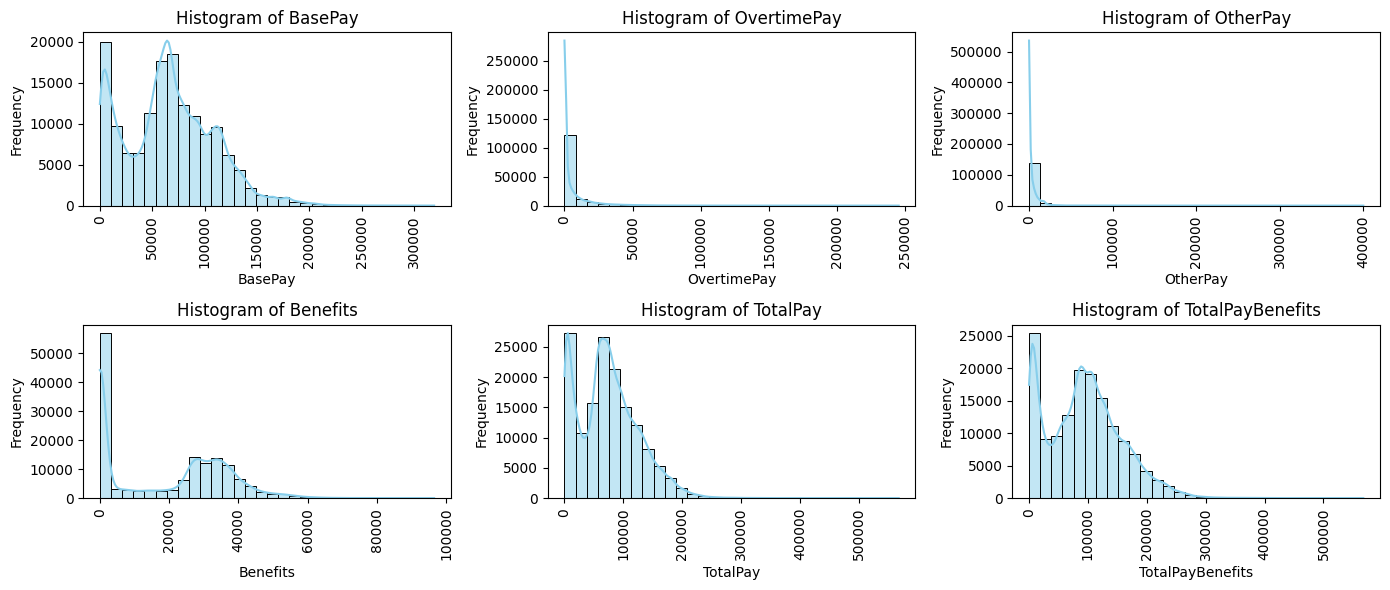

In [16]:
columns_to_plot = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))
axes = axes.flatten()

for index, column in enumerate(columns_to_plot):
    sns.histplot(df[column].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black', ax=axes[index])
    axes[index].set_title(f'Histogram of {column}')
    axes[index].set_xlabel(column)
    axes[index].set_ylabel('Frequency')
    axes[index].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [17]:
Year_values = df['Year'].unique()
print("All Year Values:")
for value in Year_values:
    print(value)

All Year Values:
2011
2012
2013
2014


**Barplot of Salaries Across Each Year**

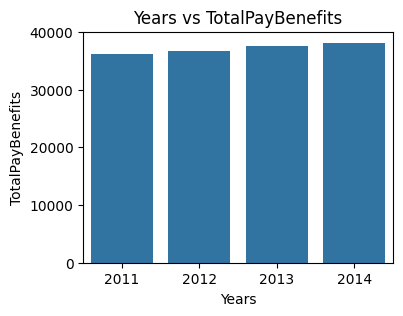

In [18]:
    plt.figure(figsize=(4, 3))
    sns.barplot(data=df, x='Year', y='TotalPay', estimator=len)
    plt.xlabel('Years')
    plt.ylabel(column)
    plt.title(f'Years vs {column}')
    plt.show()

**Pie Chart Showing Percentage of Employees in Each Department**

Used regular expressions to extract only the department names enclosed in brackets from all job title values.

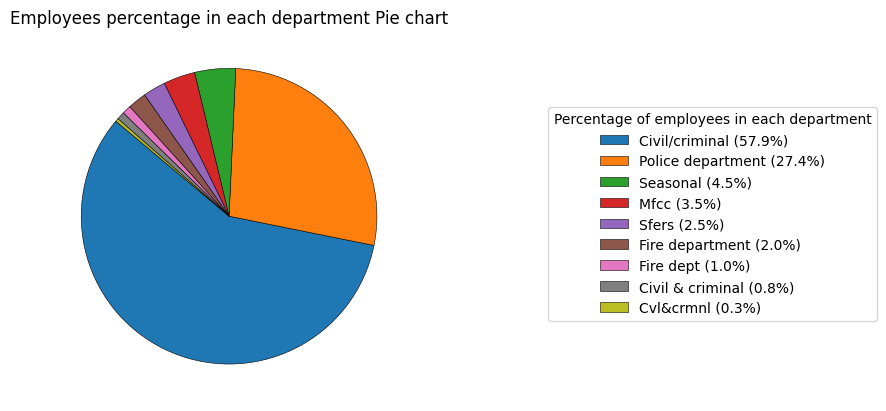

In [19]:
df['Department'] = df['JobTitle'].apply(lambda x: re.findall(r'\((.*?)\)', x)[0].capitalize() if re.findall(r'\((.*?)\)', x) else None)
department_counts = df['Department'].value_counts()
percentages = (department_counts / department_counts.sum()) * 100
plt.pie(department_counts, labels=None, autopct=None, startangle=140, wedgeprops=dict(edgecolor='black', linewidth=0.4))
legend_labels = [f'{dept} ({percent:.1f}%)' for dept, percent in zip(department_counts.index, percentages)]
plt.legend(legend_labels, title='Percentage of employees in each department', bbox_to_anchor=(1, 0.5), loc="center left", bbox_transform=plt.gcf().transFigure)
plt.title(f'Employees percentage in each department Pie chart')
plt.show()

# **Grouping Data**

**Grouping by Year**

In [20]:
group_year=df.groupby('Year')

for year,year_df in group_year:
   print(year)

2011
2012
2013
2014


In [21]:
salaries = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

for column in salaries:
    print(f"Summary statistics for {column}:\n")
    print(group_year[column].describe().round(2))
    print("\n")
    print(f"Mean {column} for each year:\n")
    means=group_year[column].mean().round(2)
    print(means)
    print("\n")

    max_mean_year = means.idxmax()
    min_mean_year = means.idxmin()

    max_mean_value = means.max()
    min_mean_value = means.min()

    print(f'Maximum {column} mean is "{max_mean_value}" in {max_mean_year}.')
    print(f'Minimum {column} mean is "{min_mean_value}" in {min_mean_year}.')

    print("\n")
    print("=============================================================================")


Summary statistics for BasePay:

        count      mean       std    min       25%       50%       75%  \
Year                                                                     
2011  36159.0  63595.96  40556.77   0.00  33468.12  62871.72  90649.76   
2012  36766.0  65456.28  41766.83   0.00  34103.84  64054.44  92427.93   
2013  37606.0  69576.95  43881.78  15.83  38025.54  67132.28  97217.34   
2014  38123.0  66564.40  44051.47   0.00  30148.82  65055.00  94731.02   

            max  
Year             
2011  294580.02  
2012  302578.00  
2013  319275.01  
2014  318835.49  


Mean BasePay for each year:

Year
2011    63595.96
2012    65456.28
2013    69576.95
2014    66564.40
Name: BasePay, dtype: float64


Maximum BasePay mean is "69576.95" in 2013.
Minimum BasePay mean is "63595.96" in 2011.


Summary statistics for OvertimePay:

        count     mean       std  min  25%  50%      75%        max
Year                                                               
2011  36159.0  

**Grouping by Department**

In [22]:
group_department=df.groupby('Department')

for department,department_df in group_department:
   print(department)

Civil & criminal
Civil/criminal
Cvl&crmnl
Fire department
Fire dept
Mfcc
Police department
Seasonal
Sfers


In [23]:
salaries = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

for column in salaries:
    print(f"Summary statistics for {column}:\n")
    print(group_department[column].describe().round(2))
    print("\n")

    print(f"Mean {column} for each year:\n")
    meanss = group_department[column].mean().round(2)
    print(meanss)
    print("\n")

    max_mean_dep = meanss.idxmax()
    min_mean_dep = meanss.idxmin()

    max_mean_value = meanss.max()
    min_mean_value = meanss.min()

    print(f'Maximum {column} mean is "{max_mean_value}" in "{max_mean_dep.capitalize()} Department".')
    print(f'Minimum {column} mean is "{min_mean_value}" in "{min_mean_dep.capitalize()} Department".')

    print("\n")
    print("=============================================================================")


Summary statistics for BasePay:

                    count       mean       std        min        25%  \
Department                                                             
Civil & criminal     22.0  177228.39  67249.63    9650.20  184579.40   
Civil/criminal     1503.0  133196.81  46837.35       0.00  108300.96   
Cvl&crmnl             9.0  211370.26  26532.91  141494.11  214883.94   
Fire department      53.0  148403.65  53517.26       0.00  147158.85   
Fire dept            25.0  212705.10  48256.12    9640.00  204032.52   
Mfcc                 90.0   66216.91  23141.62       0.00   59921.48   
Police department   712.0  129998.51  28764.84       0.00  130434.27   
Seasonal            116.0    9361.25   3910.28     293.40    7034.20   
Sfers                64.0   77351.57  42023.23     543.73   58933.84   

                         50%        75%        max  
Department                                          
Civil & criminal   206141.26  213489.03  215666.52  
Civil/criminal 

# **Correlation Analysis**

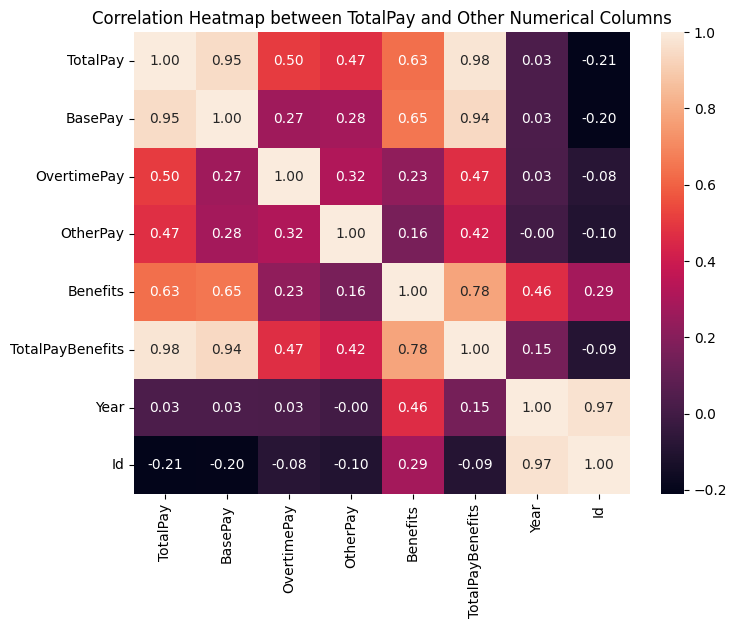

In [24]:
numerical_columns = ['TotalPay', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits','Year','Id']
cor = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(cor, annot=True, fmt=".2f")
plt.title("Correlation Heatmap between TotalPay and Other Numerical Columns")
plt.show()

**Correlation scatter plots between salary and other columns.**

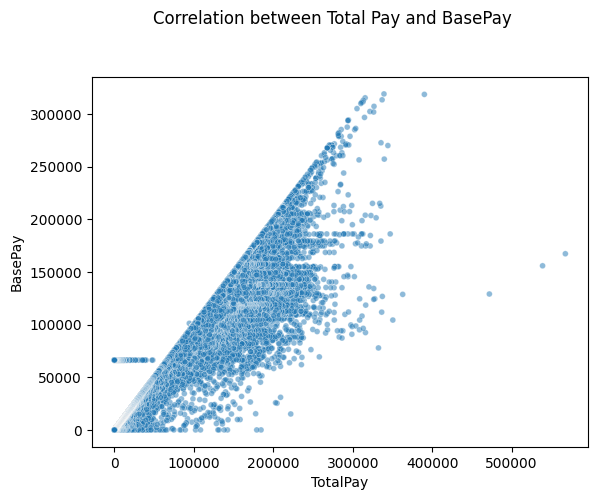

<Figure size 1000x700 with 0 Axes>

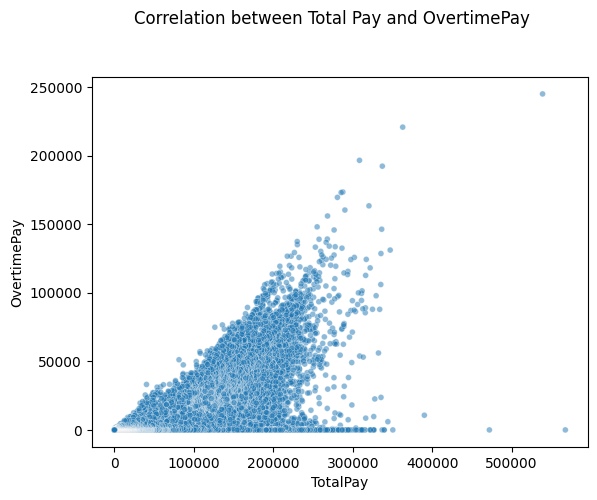

<Figure size 1000x700 with 0 Axes>

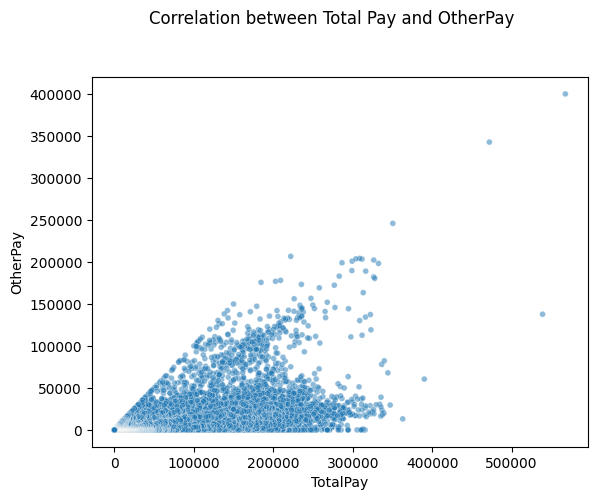

<Figure size 1000x700 with 0 Axes>

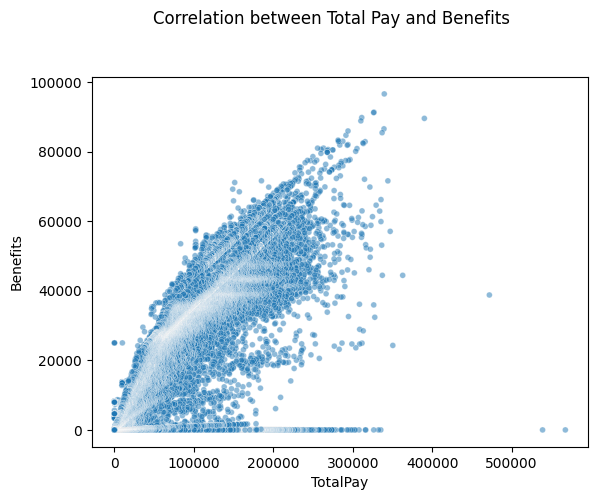

<Figure size 1000x700 with 0 Axes>

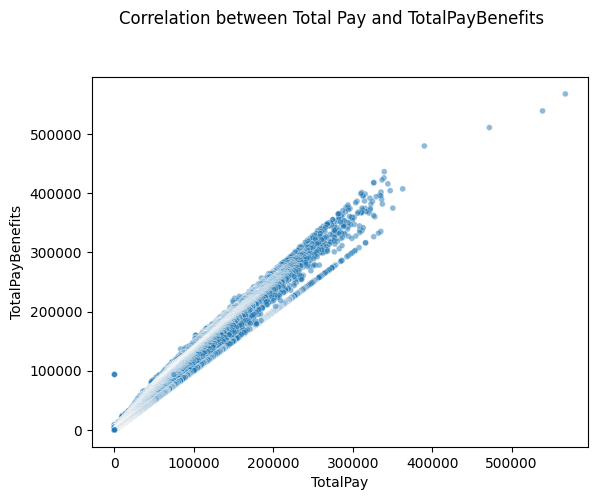

<Figure size 1000x700 with 0 Axes>

In [25]:
corr_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPayBenefits']

for cor_column in corr_columns:
  sns.scatterplot(data=df, x="TotalPay", y=cor_column,size=0.1,alpha=0.5,legend=False)
  plt.suptitle(f"Correlation between Total Pay and {cor_column}", y=1.02)
  plt.figure(figsize=(10,7))
  plt.show()

# **Summary of Insights**

**Data Attributes Overview:**

Most of the attributes are numerical, with only a few being categorical, namely EmployeeName, JobTitle, and Agency.

**Histograms and Bar Plots Insights:**

Some histograms exhibit a normal distribution shape, but they are not perfectly normally distributed due to an excessive number of zeros.

There is no significant difference between salaries in each year; the salaries for all years are closely aligned.

**Employees' Percentages in Departments:**

The percentage of employees in the Civil/Criminal department is significantly larger than the rest, with a percentage of 57.9%. Following that, the Police department has a percentage of 27.4%, and the remaining departments have smaller percentages compared to the top two.

**Grouped Insights by Year and Departments:**

The maximum mean salary is "77611.44" in 2013, while the minimum mean salary is "71744.10" in the 2011.


The maximum mean salary is "276063.43" in the "Fire Dept Department", while the minimum mean salary is "9382.64" in the "Seasonal Department".

**Correlation Insights:**

1) There is a very strong correlation between TotalPay (salary) and BasePay, and there is a very high, almost certain correlation between TotalPay and TotalPayBenefits.

2) There is a moderate correlation between salary and benefits, overtime pay, and other pay.

3) There is a very weak correlation between salary and year, and no correlation or relationship between ID and salary.